# Probabilistic Principal Geodesic Analysis (PPGA)
by Yiliang Chen

## Introduction


*Principal Component Analysis* (PCA) is a widely used method to perform dimensionality reductions. As the datasets geting larger and larger, the computational cost for training also increased dramatically. In some cases, some dimensions in the dataset might not provid useful information but make the training process more time consuming and harder to converge. Therefore, using methods like PCA to proprocess the data before the training benefits a lot. To extend such a methodology to make it suitable for data-processing on manifolds, *Principal Geodesic Analysis* was proposed. In "Probabilistic Principal Geodesic Analysis", Zhang and Fletcher, probabilistic model was utilized to expand PGA to probabilistic PGA (PPGA). Some precvious work was shown below.

In their work, "Probabilistic principal component analysis", Tipping and Bishop proposed probabilistic PCA (PPCA), which is a latent variable model for PCA. That introduced the probabilisic model into conventional PCA which extended the scope of it. 

In “Principal Component Analysis for Riemannian Manifolds, with An Application to Triangular Shape Spaces”, by Huckemann and Ziezold, a geodesic intrinsic metric-based PCA was proposed which enable us to perform PCA on a more general Manifold space.

In "Geodesic Regression and the Theory of Least Squares on Riemannian Manifolds", establish the mothodology of geodesic regression which analogous to linear regression. Some concepts like initial point and velocity was proposed as analog to incepts and slope.

## Background and Model

PPGA model inherit the concepts from PPCA, therefore, we would start with reviewing PPCA. Thr main idea of PPCA could be formulated as:
$$y = \mu + Bx + \epsilon$$
where $y$ is a $n-dimensional$ variable, $\mu$ is the mean of y, $x$ is a $q-dimensional$ latent variable, with $x \sim N(0,I)$, $B$ is an $n \times q$ factor matrix that relates $x$ and $y$, and $\epsilon \sim N(0,\sigma^2I)$ is the error. $B$ could be further decomposited as $B = W\Lambda$, where the columns of W are mutually orthogonal which represents the axes after dimensional reduction, and $\Lambda$ is a diagonal matrix of scale factors.

The probabilistic model of a random variable $y$ taking values on a Remannian manifold M is defined by the probabilistic density function
$$p(y | \mu , \tau) = \frac{1}{C(\mu,\tau)}\exp(-\frac{\tau}{2}d(\mu,y)^2)$$
$$C(\mu,\tau) = \int _M \exp(-\frac{\tau}{2}d(\mu,y)^2)dy$$
This distribution is termed as *Riemannian Normal Distribution*, and $y \sim N_m(\mu,\tau ^{-1})$ is used to denote it. $\mu \in M$ is a location parameter on the manifold, $\tau \in \mathbb{R}_+$ is a dispersion parameter analogous to the precision of Gaussian, and $d(\mu,y)$ represents the geodesic from $\mu$ to $y$.

Then the PPGA model is formulated by
$$y|x \sim N_M(Exp(\mu,z),\tau^{-1})$$
where $$z = W\Lambda x$$
$x \sim N(0,1)$ is the latent random variable in $\mathbb{R}_q$ , $\mu$ here is the base point on M, $W$ is a matrix with q columns of mutually orthogonal tangent vectors in $T_{\mu}M$, $\Lambda$ is a $q\times q$ diagonal matrix of scale factors for the columns of $W$, and $\tau$ is a scale parameter for the noise. Here, $Exp$ represents the exponential operation in manifold.

The the log likelihood of the PPGA modle is 
$$-N\log C - \Sigma^N_{i=1} \left(\frac{\tau}{2}\cdot d(Exp(\mu,z_i),y_i)^2 - \frac{\lVert x\rVert^2}{2}\right)$$
where 
$$z_i = W\Lambda x_i$$
We would use this equation in the implementation part below.

## Implementation

As a comparasion, we first do a conventional PGA and do a PPGA later.
Note this implementation of PGA is the one provided in Geomstats library under examples. 

In [25]:
import math
import os
import torch.optim as optim
import matplotlib.pyplot as plt
os.environ['GEOMSTATS_BACKEND'] = 'pytorch'

import geomstats.backend as gs
import geomstats.visualization as visualization
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.learning.frechet_mean import FrechetMean

n = 2
space = Hypersphere(n)
metric = space.metric
gs.random.seed(1)

n_samples = 200
precision = 10
last_meeting_point = gs.array([0., 1., 0.])
samples = space.random_riemannian_normal(
    mean=last_meeting_point,
    precision=precision, n_samples=n_samples)

estimator = FrechetMean(space.metric)
estimator.fit(samples)
mean = estimator.estimate_


Convergence tol reached
Final loss: tensor(20.7178)
pga_loss tensor(20.9585, grad_fn=<AddBackward0>)
Convergence tol reached
Final loss: tensor(20.5638)
pga_loss tensor(20.7153, grad_fn=<AddBackward0>)
Convergence tol reached
Final loss: tensor(20.3796)
pga_loss tensor(20.4632, grad_fn=<AddBackward0>)
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
Nan
N

/Users/yiliangchen/opt/anaconda3/envs/ECE194N/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/Users/yiliangchen/opt/anaconda3/envs/ECE194N/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return n

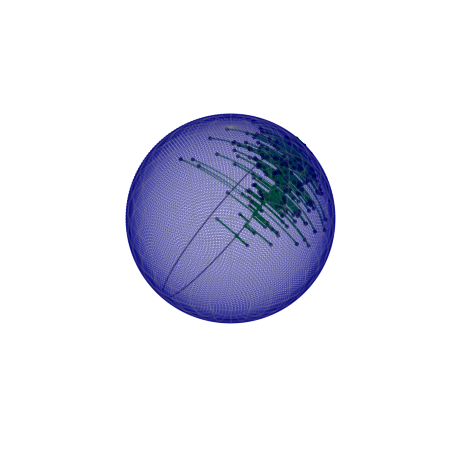

In [26]:
def model(x, tangent_vec, base_point):
    times = x[:, None] if metric.default_point_type == 'vector' else \
        x[:, None, None]
    return metric.exp(times * tangent_vec[None], base_point)


def projection(point, tangent_vec, base_point, max_iter=100, tol=1e-6):

    def loss(param):
        projected = model(param, tangent_vec, base_point)
        return gs.sum(metric.squared_dist(point, projected))

    # value_and_grad = gs.autograd.value_and_grad(loss)
    parameter = 0 if point.ndim == 1 else gs.zeros(len(point))
    parameter = parameter.requires_grad_(True)

    opt = optim.Adam([parameter], lr=0.1)

    e = 0
    loss_at_param, criterion = math.inf, math.inf
    for e in range(max_iter):
        loss_at_param = loss(parameter)
        opt.zero_grad()
        loss_at_param.backward(retain_graph=True)
        criterion = parameter.grad.detach().norm() / n_samples
        if criterion <= tol:
            print('Convergence tol reached')
            break
        opt.step()
        if gs.any(gs.isnan(parameter)):
            print('Nan')
    if e == max_iter - 1:
        print(f'Max iter reached with gradient norm: {criterion}')
    print('Final loss:', loss_at_param.detach())
    return model(parameter, tangent_vec, base_point), parameter.detach()


# proj, coefs = projection(target, beta_hat, intercept_hat, max_iter=1000)


def pga(point, base_point, max_iter=100, tol=1e-6):

    def loss(param):
        tangent_vec = space.to_tangent(param, base_point)
        projected_, _ = projection(point, tangent_vec, base_point, max_iter=max_iter)
        return gs.sum(metric.squared_dist(point, projected_)) + (
                gs.sum((param - tangent_vec) ** 2)) + gs.maximum(
                gs.sum(param ** 2) - gs.pi ** 2, 0)

    # value_and_grad = gs.autograd.value_and_grad(loss)
    parameter = 0 if point.ndim == 1 else gs.random.rand(point[-1].shape)
    parameter = parameter.requires_grad_(True)

    opt = optim.Adam([parameter], lr=0.1)

    e = 0
    errors = 0
    loss_at_param, criterion = math.inf, math.inf
    previous_loss = loss_at_param
    previous_parameter = parameter.detach().clone()
    for e in range(max_iter):
        loss_at_param = loss(parameter)
        print('pga_loss', loss_at_param)
        if loss_at_param > previous_loss:
            errors += 1
            if errors == 3:
                print('breaking')
                break

        if gs.any(gs.isnan(loss_at_param)):
            print('NaN')
            break
        opt.zero_grad()
        loss_at_param.backward()
        criterion = parameter.grad.detach().norm() / n_samples
        if criterion <= tol:
            print('Convergence tol reached')
            break
        previous_parameter = parameter.detach().clone()
        previous_loss = loss_at_param
        opt.step()

    if e == max_iter - 1:
        print('Max iter reached in PGA with grad', criterion)
    print('Final loss:', loss_at_param)
    tangent_vec_final = space.to_tangent(previous_parameter, base_point)
    projected, times = projection(point, tangent_vec_final, base_point)
    return projected.detach(), times.detach(), previous_parameter


proj, good_times, component = pga(samples, mean, max_iter=500)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
sphere_visu = visualization.Sphere(n_meridians=30)
ax = sphere_visu.set_ax(ax=ax)
sphere_visu.plot_heatmap(ax, lambda x: 1.)

path = metric.geodesic(
    initial_point=mean, initial_tangent_vec=component)
regressed_geodesic = path(
    gs.linspace(0., 1., 100) * gs.pi * 2 / metric.norm(component))

i = 10
ax.plot(
    regressed_geodesic[:, 0],
    regressed_geodesic[:, 1],
    regressed_geodesic[:, 2], c='gray')
sphere_visu.draw(ax, linewidth=1)
logs = space.metric.log(proj.detach(), samples)
geo = space.metric.geodesic(initial_point=samples, initial_tangent_vec=logs)
t = gs.linspace(0, 1, 50)
points = geo(t)
sphere_visu.draw_points(ax, points.reshape(-1, 3), s=1, c='g')
sphere_visu.draw_points(ax, proj.detach(), marker='o', c='green', s=i)
sphere_visu.draw_points(ax, samples, marker='o', c='black', s=i)
sphere_visu.draw_points(ax, gs.array([mean]), marker='o', c='r', s=i)
ax.grid(False)
plt.axis('off')

plt.show()

The PPGA model doesn't need too much modification on the PGA model. For simplicity and to make it easier to compare the performance of PGA, we set $\Lambda = 1$ since there is only one dimension after the dimensionality reduction. We will also directly provide the true value of $\mu$ to the model as the what the example did. The only optimization would be adding $\tau$ to the model. We also used the adam algorithm in pytorch as what the example did instead of the EM algorithm proposed in the paper to make it easier for time comparision. 

Instead of the loss function, we would optimize base on the log-likelihood. The function log_likelihood is actually computing the negative value of the likelihood, so we are minimizing it.
We combine $W$ and $\tau$ into one parameter $\theta$ = [$W$, $\tau$] which will be easier for it to do the optimization in pytorch.

We kept the calculation for the loss which would make it easier for us to compare the performance with the same metric.

In [27]:
def ppga(point, base_point, max_iter=100, tol=1e-6):

    ## Initialize the parameters 
    mu = mean #base point on the projected axis
    W = space.to_tangent(gs.random.rand(point[-1].shape),mu) # a vector in the tangent vector space
    lmda = 1 #scaling factor
    tau = gs.random.rand(1) # scale parameter for noise
    theta = gs.concatenate([W,tau],0)

    def loss(param):
        tangent_vec = space.to_tangent(param, base_point)
        projected_, _ = projection(point, tangent_vec, base_point)
        return gs.sum((metric.squared_dist(point, projected_))) + (
                gs.sum((param - tangent_vec) ** 2)) + gs.maximum(
                gs.sum(param ** 2) - gs.pi ** 2, 0)

    def log_likelihood(theta):
        tangent_vec = space.to_tangent(theta[0:3], base_point)
        projected_, _ = projection(point, tangent_vec, base_point)
        return (gs.sum(theta[-1:]/2*(metric.squared_dist(point, projected_))))
                
    # value_and_grad = gs.autograd.value_and_grad(loss)
    parameter = 0 if point.ndim == 1 else gs.random.rand(point[-1].shape)
    theta = theta.requires_grad_(True)

    opt = optim.Adam([theta], lr=0.1)

    e = 0
    errors = 0
    loss_at_param, criterion = math.inf, math.inf
    log_llh = math.inf
    previous_loss = loss_at_param
    pre_log_llh = log_llh
    previous_parameter = parameter.detach().clone()
    pre_theta = theta.detach().clone()

    for e in range(max_iter):
        loss_at_param = loss(theta[0:3])
        log_llh = log_likelihood(theta)
        print('pga_loss', loss_at_param)
        if loss_at_param > previous_loss:
            errors += 1
            if errors == 3:
                print('breaking')
                break

        if gs.any(gs.isnan(loss_at_param)):
            print('NaN')
            break
        opt.zero_grad()
        log_llh.backward()
        criterion = theta.grad.detach().norm() / n_samples
        if criterion <= tol:
            print('Convergence tol reached')
            break
        previous_parameter = parameter.detach().clone()
        pre_theta = theta.detach().clone()
        previous_loss = loss_at_param
        opt.step()

    if e == max_iter - 1:
        print('Max iter reached in PGA with grad', criterion)
    print('Final loss:', loss_at_param)
    tangent_vec_final = pre_theta[0:3]
    projected, times = projection(point, tangent_vec_final, base_point)
    return projected.detach(), times.detach(), pre_theta[0:3]

Max iter reached with gradient norm: 0.00010451541311340407
Final loss: tensor(20.5861)
Max iter reached with gradient norm: 0.00010451541311340407
Final loss: tensor(20.5861)
pga_loss tensor(20.5861, grad_fn=<AddBackward0>)
Max iter reached with gradient norm: 0.0001254575909115374
Final loss: tensor(20.3589)
Max iter reached with gradient norm: 0.0001254575909115374
Final loss: tensor(20.3589)
pga_loss tensor(20.3692, grad_fn=<AddBackward0>)
Max iter reached with gradient norm: 0.00012089437950635329
Final loss: tensor(20.0968)
Max iter reached with gradient norm: 0.00012089437950635329
Final loss: tensor(20.0968)
pga_loss tensor(20.1367, grad_fn=<AddBackward0>)
Max iter reached with gradient norm: 0.00012358125241007656
Final loss: tensor(19.7539)
Max iter reached with gradient norm: 0.00012358125241007656
Final loss: tensor(19.7539)
pga_loss tensor(19.8422, grad_fn=<AddBackward0>)
Max iter reached with gradient norm: 0.00012130189861636609
Final loss: tensor(19.3351)
Max iter reach

/Users/yiliangchen/opt/anaconda3/envs/ECE194N/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/Users/yiliangchen/opt/anaconda3/envs/ECE194N/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return n

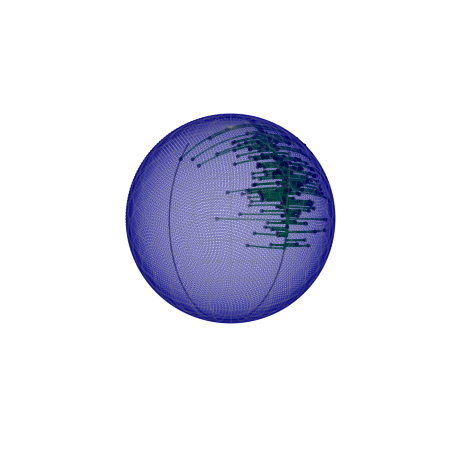

In [28]:
proj, good_times, component = ppga(samples, mean, max_iter=500)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
sphere_visu = visualization.Sphere(n_meridians=30)
ax = sphere_visu.set_ax(ax=ax)
sphere_visu.plot_heatmap(ax, lambda x: 1.)

path = metric.geodesic(
    initial_point=mean, initial_tangent_vec=component)
regressed_geodesic = path(
    gs.linspace(0., 1., 100) * gs.pi * 2 / metric.norm(component))

i = 10
ax.plot(
    regressed_geodesic[:, 0],
    regressed_geodesic[:, 1],
    regressed_geodesic[:, 2], c='gray')
sphere_visu.draw(ax, linewidth=1)
logs = space.metric.log(proj.detach(), samples)
geo = space.metric.geodesic(initial_point=samples, initial_tangent_vec=logs)
t = gs.linspace(0, 1, 50)
points = geo(t)
sphere_visu.draw_points(ax, points.reshape(-1, 3), s=1, c='g')
sphere_visu.draw_points(ax, proj.detach(), marker='o', c='green', s=i)
sphere_visu.draw_points(ax, samples, marker='o', c='black', s=i)
sphere_visu.draw_points(ax, gs.array([mean]), marker='o', c='r', s=i)
ax.grid(False)
plt.axis('off')

plt.show()

## Demonstration and Analysis

It takes slightly longer for the PPGA model to finish, but with 200 samples, it has a better performance. The final loss after performing PPGA is around 18 while PGA gives a final loss around 20.

The time difference is very small which could be omitted. Also tried with different number of samples, for a huge number of samples, the improvement is also not big enough. The previous improvement could also because of different initital value of the parameters.